<a href="https://colab.research.google.com/github/Danilov-Aleksandr/CV_Korpus/blob/master/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D1%80%D0%B0%D0%BA%D0%B0_%D0%B3%D1%80%D1%83%D0%B4%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация образцов биопсии

Задача: по результатам биопсии классифицировать доброкачественные (В) и злокачественные (М) образцы опухолей

Данные и их описание https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data

#Загрузка данных

In [1]:
# любым удобным способом загрузите данные (фаил data.csv), ссылка на архив в первой ячейке

from google.colab import drive
drive.mount('/content/gdrive')

!cp "/content/gdrive/My Drive/korpus/datasets_180_408_data.csv" /content && ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
datasets_180_408_data.csv  gdrive  sample_data


In [10]:
# Сформируем матрицу данных X и вектор ответов y 

import pandas as pd

data = pd.read_csv('datasets_180_408_data.csv', index_col=0)
data.drop(['Unnamed: 32'], axis=1, inplace=True)
# data.info() 

X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis'].tolist()

In [11]:
#gender = {'B': 0,'M': 1} 
  

#y = [gender[item] for item in y] 

#Решение "в лоб"

In [13]:
""" 
Используя классификатор LogisticRegression из sklearn.linear_model посчитайте прогноз.

Обратите внимание на предупреждение:
  Increase the number of iterations (max_iter) or scale the data
Оно говорит о том, что оптимизатор не может сойтись. По-умолчанию оптимизатор делает 100 
итераций для поиска минимума функции ошибки. На следующем шаге мы решим эту проблему 
масштабированием признаков, а пока попробуйте подобрать количество итераций, при которых 
оптимизатор сходится. Обратите внимание, как изменятся метрики по мере настойки алгоритма.
"""

# обучите классификатор LogisticRegression с параметрами по-умолчанию, 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
# затем увеличьте параметр max_iter до сходимости оптимизатора

#lr.fit(X_train, y_train, max_iter=200)

# посчитайте предсказания для тестовой части выборки
y_pred = lr.predict(X_test)


# для вывода метрик удобно использовать classification_report
from sklearn.metrics import classification_report



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B'],
      dtype='<U1')

In [15]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           B      0.967     0.989     0.978        89
           M      0.981     0.944     0.962        54

    accuracy                          0.972       143
   macro avg      0.974     0.967     0.970       143
weighted avg      0.972     0.972     0.972       143



#Стандартизация значений признаков
 
**Почему это важно**

Есть несколько причин, требующих приводить признаки в соизмеримый масштаб. Одна из нах свящана с работой оптимизатора, что мы и видели в ячейках выше.

**Что значит соизмеримые признаки**

При работе с картинками часто просто приводят в диапазон [0, 1], то есть делят все значения пикселей на 255. 

Можно приводить к нормальному виду (среднее = 0 и ср.-квадрат. отклонение = 1). 
Для этого из каждого значения вычитаем среднее по выборке и делим на стандартное отклонение выборки. Или используем одно из предоставленных sk-learn решений.

## Стандартизация признаков через StandardScaler():

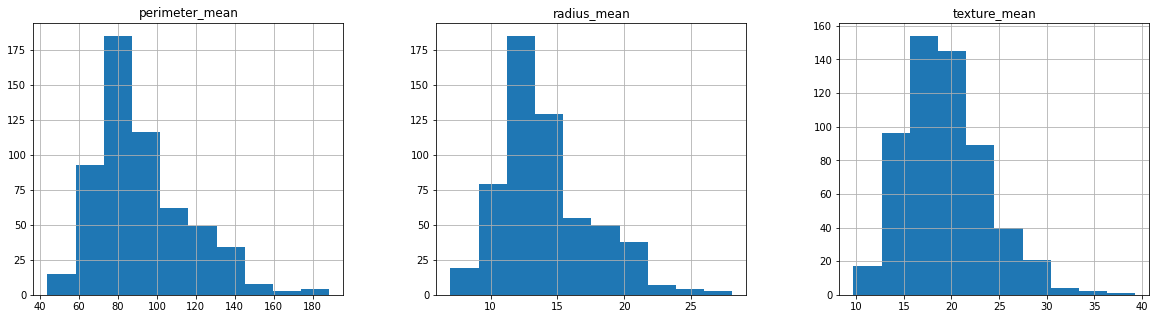

In [16]:
# Выведем гистограммы первых трех признаков как они есть в датасете
%matplotlib inline
hist = X.hist(column=X.columns[:3], layout=(1,3), figsize=(20, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7a66702b0>,
      dtype=object)

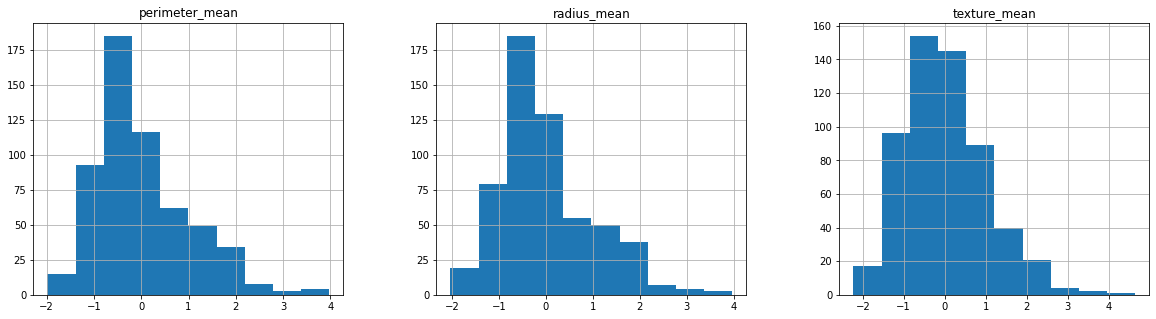

In [17]:
# Нормируем признаки и выведем
from sklearn import preprocessing

scaler = preprocessing.StandardScaler() # инициализируем стандартизатор
scaled_X = scaler.fit(X) # его тоже надо учить 
scaled_X = scaler.transform(X) # затем изменить данные

# вернем данные в dataframe
names = X.columns
scaled_X = pd.DataFrame(scaled_X, columns=names)

# и построим гистограммы
scaled_X.hist(column=X.columns[:3], layout=(1,3), figsize=(20, 5))

##Обучение на стандартизированных данных

In [ ]:
scaled_X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [18]:
"""
По аналогии с предыдущим заданием, обучите классификатор LogisticRegression,
но уже на стандартизированных данных. Обратите внимание на количество итераций оптимизатора
и метрики модели. 
"""

# напишите код стандартизации данных и обучения на них

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, random_state=42)

lr2 = LogisticRegression()
lr2.fit(X_train, y_train)

y_pred = lr2.predict(X_test)
# выведите метрики и сравните с прошлым экспериментом
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           B      0.989     0.978     0.983        89
           M      0.964     0.981     0.972        54

    accuracy                          0.979       143
   macro avg      0.976     0.980     0.978       143
weighted avg      0.979     0.979     0.979       143



#Кросс-валидация

Кросс-валидация популярный прием. Кроме борьбы с переобучением, она позволяет подбирать гиперпараметры модели. 

В данном задании используем LogisticRegressionCV с функцией подбора силы резуляризации (коэффициент С) через кросс-валидацию

Напомню, регуляризация в линейных моделях - это шраф за высокие весовые коэффициенты (признак переобучения).

In [24]:
from sklearn.linear_model import LogisticRegressionCV

In [25]:

# посчитайте прогноз, используя модель 
lr_cv = LogisticRegressionCV(cv=3, scoring='f1', max_iter=300)
# оптимизатору нужно немного больше итераций из-за маленькой выборки и большого разброса данных

# напишите код обучения с подбором регуляризации через кросс-валидацию
lr_cv.fit(X_train, y_train)
lr_cv.predict(X_test)

# выведите метрики и сравните с прошлым экспериментом
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           B      0.989     0.978     0.983        89
           M      0.964     0.981     0.972        54

    accuracy                          0.979       143
   macro avg      0.976     0.980     0.978       143
weighted avg      0.979     0.979     0.979       143



In [27]:
# посмотрите как работает кросс-валидация

print('Значения С для подбора \n', lr_cv.Cs_, '\n')
print('Полученные значения F1-меры для каждого С в каждом фолде \n', lr_cv.scores_, '\n')
print('Выбранное С ', lr_cv.C_)

Значения С для подбора 
 [1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04] 

Полученные значения F1-меры для каждого С в каждом фолде 
 {'M': array([[0.        , 0.64935065, 0.89361702, 0.97087379, 0.98076923,
        0.97142857, 0.95238095, 0.94444444, 0.93577982, 0.93577982],
       [0.        , 0.82608696, 0.92156863, 0.97087379, 0.97087379,
        0.97087379, 0.95145631, 0.95145631, 0.95145631, 0.95145631],
       [0.03703704, 0.73809524, 0.89583333, 0.90721649, 0.93069307,
        0.88888889, 0.88888889, 0.88888889, 0.9       , 0.91089109]])} 

Выбранное С  [0.35938137]
